In [1]:
import numpy as np
import bigfloat as bgft
import mpmath as mp
from scipy import integrate as integ
from matplotlib import pyplot as plt
%matplotlib inline

# Question 1.

## (a)

The governing equations are:

$$ fu + \frac{u^2 \tan{\theta}}{a} = - \frac{1}{a} \frac{\partial \Phi}{\partial \theta} \ \ \ \ (1.1) $$

$$ 0 = - \frac{\partial \Phi}{\partial z} + b \ \ \ \ (1.2) $$

so taking the $z$ derivative of $(1.1)$ and plugging $(1.2)$ in gives:

$$ f \frac{\partial u}{\partial z} + 2 u \frac{\partial u}{\partial z} \frac{\tan{\theta}}{a} = - \frac{1}{a} \frac{\partial}{\partial \theta} \frac{\partial \Phi}{\partial z} = - \frac{1}{a} \frac{\partial b}{\partial \theta} $$

## (b)

From the definition of buoyancy:

$$ \frac{1}{g} \frac{\partial b}{\partial \theta} = - \Delta_H \sin{2 \theta} $$

so the thermal wind equation becomes:

$$ \frac{\partial}{\partial z} \bigg( fu + \frac{u^2 \tan{\theta}}{a} \bigg) = \frac{g}{a} \Delta_H \sin{2 \theta} $$

Integrating this over $z$ gives:

$$ \tan{\theta} \ u^2 + af \ u = g \Delta_H \sin{2\theta} \ (z+C) $$

where $C$ is the integral constant. Solving for $u$ yields:

$$ u = \frac{-a f \pm \sqrt{a^2f^2 + 4 \tan{\theta} g \Delta_H \sin{2 \theta}\ (z+c)}}{2 \tan{\theta}} \\ = \frac{- 2 a \Omega \sin{\theta} \pm \sqrt{4 a^2 \Omega^2 \sin^2{\theta} + 8 \sin^2{\theta} g \Delta_H (z+C)}}{2 \sin{\theta}/\cos{\theta}} \\ = a \Omega \cos{\theta} \bigg[ -1 \pm \sqrt{1 + \frac{2 g \Delta_H}{a^2 \Omega^2} (z+C) } \bigg] \\ = a \Omega \bigg[ -1 \pm \sqrt{1 + 2R \big( \frac{z+C}{H} \big) } \bigg] \cos{\theta} $$

From the boundary condition: $u=0 \ \ @ \ z=0$, $C=0$ and we take the addition from the $\pm$. Hence,

$$ u = a \Omega \bigg( \sqrt{1 + 2R \frac{z}{H}} -1 \bigg) \cos{\theta} $$

In [3]:
theta = np.arange(-.5*np.pi, .5*np.pi, 1e-2)
z = np.arange(0, 1, 1e-3)
R = 1.
u = (np.sqrt(1 + R*z[:, np.newaxis]) - 1.) * np.cos(theta)

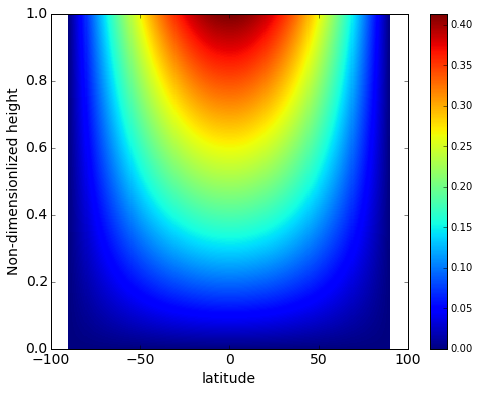

In [15]:
plt.figure(figsize=(8,6))
plt.pcolormesh(theta/np.pi*180, z, u)
plt.colorbar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('latitude', fontsize=14)
plt.ylabel('Non-dimensionlized height', fontsize=14)

## (c)

$$ M = a^2 \cos^2{\theta} + u a \cos{\theta} = a^2 \cos^2{\theta} + a^2 \cos^2{\theta} \ \Omega \bigg( \sqrt{1+2R \frac{z}{H}} - 1 \bigg) = a^2 \cos^2{\theta} \bigg[ 1+ \Omega \big( \sqrt{1 + 2R \frac{z}{H}} - 1 \big) \bigg] $$

Since $\cos^2{\theta}$ takes it maximum value in $\theta \in [\pi/2, \pi/2]$ at $\theta = 0$, the angular momentum is largest at the equator.

# Question 2.

Assuming the Brunt-Vaisala frequency, $N$ is constant, we can put the term, $\frac{{f_0}^2}{N^2}$ ouside of the $z$ derivative so:

$$ q' = {\nabla_h}^2 e^{\ z/2H} \tilde{\psi} + \frac{1}{\rho_0} e^{\ z/H} \frac{{f_0}^2}{N^2} \frac{\partial}{\partial z} \bigg[ \rho_0 e^{-z/H}  \frac{\partial}{\partial z} \big( e^{\ z/2H} \tilde{\psi} \big) \bigg] \\ = e^{\ z/2H} {\nabla_h}^2 \tilde{\psi} + e^{\ z/H} \frac{{f_0}^2}{N^2} \bigg[ -\frac{1}{H} e^{-z/H} e^{\ z/2H} \big( \frac{1}{2H} \tilde{\psi} + \frac{\partial \tilde{\psi}}{\partial z} \big) + e^{-z/H} e^{\ z/2H} \big( \frac{1}{4H^2} \tilde{\psi} + \frac{1}{H} \frac{\partial \tilde{\psi}}{\partial z} + \frac{\partial^2 \tilde{\psi}}{\partial z^2} \big) \bigg] \\ = e^{\ z/2H} {\nabla_h}^2 \tilde{\psi} + e^{\ z/2H} \frac{{f_0}^2}{N^2} \bigg( - \frac{1}{4H^2} \tilde{\psi} + \frac{\partial^2 \tilde{\psi}}{\partial z^2} \bigg) $$

Hence,

$$ q' = e^{\ z/2H} \bigg[ {\nabla_h}^2 \tilde{\psi} + \frac{{f_0}^2}{N^2} \Big( \frac{\partial^2}{\partial z^2} - \frac{1}{4H^2} \Big) \tilde{\psi} \bigg] $$

# Question 3.

Equations to use are:

$$ \psi_n = a_n \psi_{n+1} + b_n $$

$$ a_n \equiv \frac{1}{2 - \delta^2 l_n^2 - a_{n-1}}, \ \ \ b_n \equiv \frac{b_{n-1}}{2 - \delta^2 l_n^2 - a_{n-1}} $$

$$ a_0 \equiv \frac{1}{1 - i \delta l_0 - \frac{\delta^2 l_0^2}{2}}, \ \ \ b_0 \equiv \frac{-2i \delta l_0}{1 - i\delta l_0 - \frac{\delta^2 l_0^2}{2}} $$

$$ \psi_N = \frac{b_{N-1}}{1 - i \delta l_N - \frac{\delta^2 l_N^2}{2} - a_{N-1}} $$

In [2]:
k = 1.5e-6
L = 7e6
omega = 7.29e-5
a = 6.37e6
beta = 2 * omega / np.sqrt(2) / a
c = -2.
l_a = np.sqrt(- beta/c - k**2)
print l_a**2

5.84232093383e-12


## (a)

### i.

For $ \bar{U} = 0 $, equation (4) becomes:

$$ l^2(y) = - \frac{\beta}{c} - k^2 $$

For a propagating wave, the index refraction has to be positive, viz. $ l^2(y) > 0 $ so,

$$ - \frac{\beta}{c} - k^2 > 0 \ \ \ \ \therefore - \frac{\beta}{c} > k^2 > 0 $$

For the inequality equation above to hold, the zonal phase speed has to be negative because $ \beta>0 $ in the northern hemisphere. Hence,

$$ - \frac{\beta}{k^2} < c < 0 $$

Now, we shall derive the meridional group velocity. The dispersion relation is,

$$ \omega = ku - \frac{\beta k}{k^2 + l^2} $$

$$ \therefore {c_g}^y = \frac{\partial \omega}{\partial l} = \frac{\beta k}{(k^2 + l^2)^2} 2l = \pm \frac{2 \beta k}{(k^2 + l^2)^2}{\sqrt{-\frac{\beta}{c} - k^2}} $$

Hence, the wave solution $e^{\ i |l| y}$ has a poleward group velocity, i.e. 

$$ {c_g}^y = \frac{2 \beta k}{(k^2 + l^2)^2}{\sqrt{-\frac{\beta}{c} - k^2}} $$

### ii.

#### Define a function that solves for $\psi$ and $R$

In [3]:
def psi_func(a=6.37e6, omega=7.29e-5, k=1.5e-6, c=-2., cos45=1./np.sqrt(2), L=7e6, delta=1e0, 
             bound=True, scalar=True, damp=False, approx=True, Uo=0., r=2e-2):

    beta = 2 * omega * cos45 / a
    y = np.arange(0, L, delta)
    
    if scalar:                                        # if U is a scalar
        if damp:                                    # if there is damping 
            r /= 24 * 60**2
            l2 = beta/(Uo-c) - k**2 - 1j * r * beta / ( k * (Uo-c)**2 )
            lr = np.sqrt( beta/(Uo-c) - k**2 )
            li = r * beta / ( 2. * k * lr * (Uo-c)**2 )
            l = lr + 1j * li
        else:                                          # No damping
            l2 = beta/(Uo-c) - k**2
            l = np.sqrt( l2 )
            
    else:                                               # if U is a vector
        U = Uo * ( np.sin(np.pi/L*y) )**4
        ddUdyy = 4.*Uo*( np.pi/L )**2 * ( 3.*(np.sin(np.pi/L*y)*np.cos(np.pi/L*y) )**2 - ( np.sin(np.pi/L*y) )**4 )
        if damp:                                     # if there is damping
            r /= 24 * 60**2
#             l2 = (beta - ddUdyy) / (U - c) - k**2 + 1j * r * (beta - ddUdyy) / ( k * (U-c)**2 )
            l2 = (beta - ddUdyy) / (U - c - 1j * r / k) - k**2
            
            if approx:                                                       # Use the approximation that r/k << 1
                if all( i >= 0 for i in np.real(l2) ):             # If real part of l2 is all positive
                    lr = np.sqrt( np.real(l2) )
                    li = r * (beta - ddUdyy) / ( 2. * k * lr * (U-c)**2 ) 
                    l = lr + 1j * li
                else:                                                           # If there are negative values in the real part of l2
                    lr = np.zeros(len(y), dtype=complex)
                    li = np.zeros(len(y), dtype=complex)
                    l = np.zeros(len(y), dtype=complex)
                    for i in range( len(l2) ):
                        if np.real( l2[i] ) >= 0:
                            lr[i] = np.sqrt( np.real(l2[i]) )
                            li[i] = r * (beta - ddUdyy[i]) / ( 2. * k * lr[i] * (U[i]-c)**2 )  
                            l[i] = lr[i] + 1j * li[i]
                        else:
                            lr[i] = 1j * np.sqrt( - np.real(l2[i]) )
                            li[i] = r * (beta - ddUdyy[i]) / ( 2. * k * lr[i] * (U[i]-c)**2 )  
                            l[i] = lr[i] + 1j * li[i]
            else:                                                               # Don't use the approximation, r/k<<1
                l = np.sqrt(l2)
                lr = np.real(l)
                li = np.imag(l)
                
        else:                                          # No damping
            l2 = (beta-ddUdyy)/(U-c) - k**2
            
            if all( i >= 0 for i in l2 ):                            # If l2 is all positive
                l = np.sqrt( l2 )
            else:                                                         # If there are negative values in l2
                l = np.zeros(len(y), dtype=complex)
                for i in range(len(l2)):
                    if l2[i] >= 0:
                        l[i] = np.sqrt( l2[i] )
                    else:
                        l[i] = 1j * np.sqrt( -l2[i] )
   
    psi = np.empty( len(y), dtype=complex )
    psi[:] = np.nan
    a = psi.copy()
    b = psi.copy()
    
    if scalar:                                                           # If l is a scalar
        a[0] = 1. / ( 1. - 1j*delta*l - .5*delta**2*l**2 )
        b[0] = - 2j*delta*l / ( 1. - 1j*delta*l - .5*delta**2*l**2 )
        for i in range(1, len(y)):
            a[i] = 1. / ( 2. - delta**2*l**2 - a[i-1] )
            b[i] = b[i-1] / ( 2. - delta**2*l**2 - a[i-1] )
    else:                                                                 # If l is a vector
        a[0] = 1. / ( 1. - 1j*delta*l[0] - .5*delta**2*l[0]**2 )
        b[0] = - 2j*delta*l[0] / ( 1. - 1j*delta*l[0] - .5*delta**2*l[0]**2 )
        for i in range(1, len(y)):
            a[i] = 1. / ( 2. - delta**2*l[i]**2 - a[i-1] )
            b[i] = b[i-1] / ( 2. - delta**2*l[i]**2 - a[i-1] )
    
    if bound:                                                         # Radiation boundary condition
        if scalar:                                                      # If l is a scalar
            psi[-1] = b[-2] / ( 1. - 1j*delta*l - .5*delta**2*l**2 - a[-2] )
        else:                                                            # If l is a veltor
            psi[-1] = b[-2] / ( 1. - 1j*delta*l[-1] - .5*delta**2*l[-1]**2 - a[-2] )
    
    else:                                                                # Rigid lid boundary condition
        psi[-1] = 0.
    
    for i in range( len(y)-2, -1, -1 ):                   # Iterate psi
        psi[i] = a[i] * psi[i+1] + b[i]
        
    R = psi[0] - 1.
    
    return y, psi, R, a, b, l, l2

In [51]:
y_a21, psi_a21, R_a21, a_a21, b_a21, l_a21, l2_a21 = psi_func(delta=1e3)
y_a22, psi_a22, R_a22, a_a22, b_a22, l_a22, l2_a22 = psi_func(delta=5e2)
y_a23, psi_a23, R_a23, a_a23, b_a23, l_a23, l2_a23 = psi_func(delta=1e2)

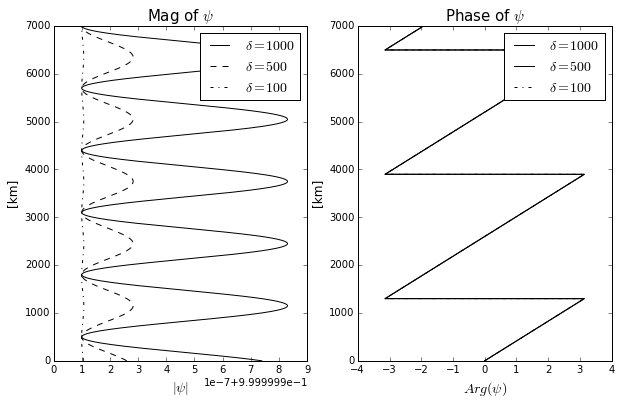

In [52]:
fig = plt.figure( figsize=(10, 6) )

ax1 = fig.add_subplot(121)
one = ax1.plot(np.absolute(psi_a21), y_a21*1e-3, 'k', label=r'$\delta=1000$')
two = ax1.plot(np.absolute(psi_a22), y_a22*1e-3, 'k--', label=r'$\delta=500$')
three = ax1.plot(np.absolute(psi_a23), y_a23*1e-3, 'k-.', label=r'$\delta=100$')
ax1.set_xlabel(r'$|\psi|$', fontsize=14)
ax1.set_ylabel('[km]', fontsize=12)
ax1.set_title('Mag of $\psi$', fontsize=15)
plt.legend(loc='upper right', fontsize=14)

ax2 = fig.add_subplot(122)
one = ax2.plot(np.angle(psi_a21), y_a21*1e-3, 'k', label=r'$\delta=1000$')
two = ax2.plot(np.angle(psi_a22), y_a22*1e-3, 'k-', label=r'$\delta=500$')
three = ax2.plot(np.angle(psi_a23), y_a23*1e-3, 'k-.', label=r'$\delta=100$')
ax2.set_xlabel(r'$Arg(\psi)$', fontsize=14)
ax2.set_ylabel('[km]', fontsize=12)
ax2.set_title('Phase of $\psi$', fontsize=15)
plt.legend(loc='upper right', fontsize=14)

[  6.38907224e-07 -2.41615919e-07j   1.59848303e-07 -6.02406810e-08j
   6.28051344e-09 -3.16525371e-09j]


(array([-0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015]),
 <a list of 6 Text yticklabel objects>)

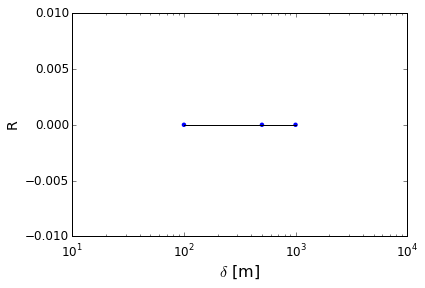

In [53]:
delta = np.array([1e3, 5e2, 1e2]) 
R_a2 = np.array( [R_a21, R_a22, R_a23] )
zeros = np.zeros(3)
print R_a2
# plt.figure( figsize=(8,6) )
# plt.scatter( delta, np.real(R) )

fig = plt.figure( figsize=(6,4) )
ax = plt.gca()
ax.scatter(delta, np.real(R_a2), c='blue', edgecolors='none')
ax.plot(delta, zeros, c='black')
ax.set_xscale('log')
ax.set_ylabel('R', fontsize=14)
ax.set_xlabel('$\delta$ [m]', fontsize=16)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

##### Discussion

We see from the figures above that the magnitude of $\psi$ converges to one throughout the domain when the resolution increases and that the magnitude of the reflection coefficient, $R$ converges to zero. 

### iii.

In [54]:
y_a31, psi_a31, R_a31, a_a31, b_a31, l_a31, l2_a31 = psi_func( delta=1e3, bound=False )
y_a32, psi_a32, R_a32, a_a32, b_a32, l_a32, l2_a32 = psi_func( delta=5e2, bound=False )
y_a33, psi_a33, R_a33, a_a33, b_a33, l_a33, l2_a33 = psi_func( delta=1e2, bound=False )

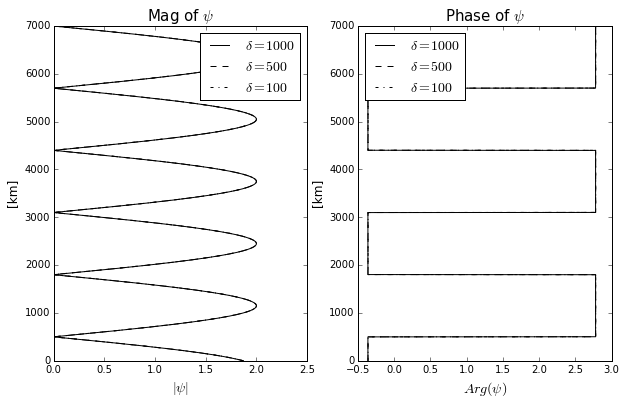

In [55]:
fig = plt.figure( figsize=(10, 6) )

ax1 = fig.add_subplot(121)
one = ax1.plot(np.absolute(psi_a31), y_a31*1e-3, 'k', label=r'$\delta=1000$')
two = ax1.plot(np.absolute(psi_a32), y_a32*1e-3, 'k--', label=r'$\delta=500$')
three = ax1.plot(np.absolute(psi_a33), y_a33*1e-3, 'k-.', label=r'$\delta=100$')
ax1.set_xlabel(r'$|\psi|$', fontsize=14)
ax1.set_ylabel('[km]', fontsize=12)
ax1.set_title('Mag of $\psi$', fontsize=15)
plt.legend(loc='upper right', fontsize=14)

ax2 = fig.add_subplot(122)
one = ax2.plot(np.angle(psi_a31), y_a31*1e-3, 'k', label=r'$\delta=1000$')
two = ax2.plot(np.angle(psi_a32), y_a32*1e-3, 'k--', label=r'$\delta=500$')
three = ax2.plot(np.angle(psi_a33), y_a33*1e-3, 'k-.', label=r'$\delta=100$')
ax2.set_xlabel(r'$Arg(\psi)$', fontsize=14)
ax2.set_ylabel('[km]', fontsize=12)
ax2.set_title('Phase of $\psi$', fontsize=15)
plt.legend(loc='upper left', fontsize=14)


[ 0.74976218-0.66170739j  0.75135508-0.65989813j  0.75262832-0.6584456j ]


(array([ 0.99 ,  0.995,  1.   ,  1.005,  1.01 ,  1.015]),
 <a list of 6 Text yticklabel objects>)

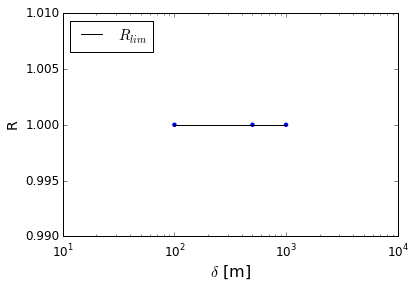

In [56]:
delta = np.array([1e3, 5e2, 1e2]) 
R_a3 = np.array( [R_a31, R_a32, R_a33] )
R_lim_a3 = np.absolute( -np.exp( 2j*l_a*L ) ) * np.ones(3)
print R_a3
# plt.figure( figsize=(8,6) )
# plt.scatter( delta, np.real(R) )

fig = plt.figure( figsize=(6,4) )
ax = plt.gca()
ax.scatter( delta, np.absolute(R_a3) , c='blue', edgecolors='none' )
ax.plot( delta, R_lim_a3, c='black', label=r'$R_{lim}$')
ax.set_xscale('log')
ax.set_ylabel('R', fontsize=14)
ax.set_xlabel('$\delta$ [m]', fontsize=16)
plt.legend(loc='upper left', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

##### Discussion

We see from the figures above that $ \psi $ corresponds to a standing wave with its phase switches discontinuously every half wavelength by $180^\circ$ with its phase  and that the reflection coefficient, $| R |$ approaches $\big| e^{-2 i l_0 L} \big|$ as the resolution increases.

## (b)

$$ \bar{U} = U_0 \sin^4{\frac{\pi y}{L}} $$

$$ \frac{\partial^2 \bar{U}}{\partial y^2} = 4 U_0 \big( \frac{\pi}{L} \big)^2  \sin^2{\frac{\pi y}{L}} \bigg[ 3 \cos^2{\frac{\pi y}{L}} - \sin^2{\frac{\pi y}{L}} \bigg] $$

$$ l(y) = \frac{\beta - \frac{\partial^2 \bar{U}}{\partial y^2}}{\bar{U} - c} - k^2 $$

WKB solution:

$$ \psi^{WKB}(k, y, \omega) = \frac{\psi_0}{\sqrt{l(y)}} \ e^{ \ i \int^y l(y) dy} + \frac{\psi_1}{\sqrt{l(y)}} \ e^{ - i \int^y l(y) dy} $$

At the boundary, we need to have:

$$ \psi( y=0 ) = 1 + R $$

so if we define $g(y) \equiv \int^y l(y) \ dy$, we should have

$$ g(0) = 0, \ \ \ \psi_0 = \sqrt{l(0)}, \ \ \ \psi_1 = R \sqrt{l(0)} $$

### i.

In [22]:
delta_b = 1e2
Uo_b1 = 3.

In [23]:
y_b1, psi_b1, R_b1, a_b1, b_b1, l_b1, l2_b1 = psi_func(delta=delta_b, scalar=False, Uo=Uo_b1)

In [24]:
U_b1 = Uo_b1 * ( np.sin(np.pi/L*y_b1) )**4
# ddUdyy_b1 = 4.*Uo_b1*( np.pi/L*np.sin(np.pi/L*y_b1) )**2 * ( 3.*(np.cos(np.pi/L*y_b1) )**2 - ( np.sin(np.pi/L*y_b1) )**2 )
# l_b1 = np.sqrt( (beta-ddUdyy_b1)/(U_b1-c) - k**2 )

##### Solve $$g(y) = \int^y_0 l(y) dy$$       $$l(y) = \frac{\beta - \frac{\partial^2 \bar{U}}{\partial y^2}}{\bar{U} - c} - k^2$$

In [25]:
# integrand = lambda y: ( beta - 4.*Uo_b1*( np.pi/L*np.sin(np.pi*y/L) )**2 * ( 3.*(np.cos(np.pi*y/L))**2 
#                                                         - (np.sin(np.pi*y/L))**2) ) / ( Uo_b1*(np.sin(np.pi*y/L))**4 - c ) - k**2

g_b1 = np.zeros( len(y_b1), dtype=complex )
for i in range(1, len(y_b1)):
#     g_b1[i] = integ.quad(integrand, y_b1[0], y_b1[i])[0]
    g_b1[i] = l_b1[:i].sum() * delta_b

##### For a radiation boundary condition, the reflective coefficient should be zero, i.e. R=0

In [26]:
R_WKB_b1 = 0.

psi_WKB_b1 = np.sqrt(l_b1[0]) / ( np.sqrt(l_b1) ) * np.exp( 
                                    1j*g_b1 ) + R_WKB_b1 * np.sqrt(l_b1[0]) /( np.sqrt(l_b1) ) * np.exp( - 1j*g_b1 )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

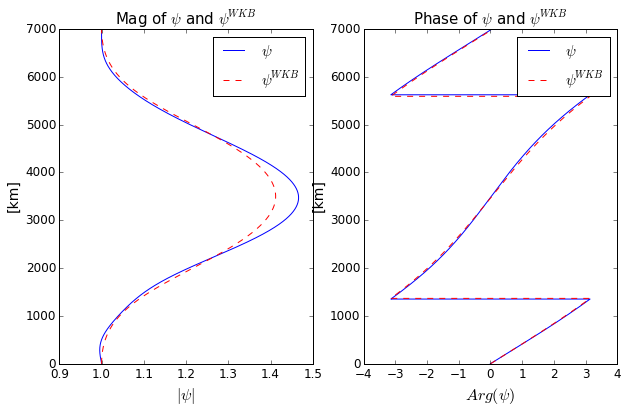

In [27]:
fig = plt.figure( figsize=(10,6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.absolute(psi_b1), y_b1*1e-3, 'b', label=r'$\psi$')
ax1.plot(np.absolute(psi_WKB_b1), y_b1*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('$|\psi|$', fontsize=16)
ax1.set_title(r'Mag of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(np.angle(psi_b1), y_b1*1e-3, 'b', label=r'$\psi$')
ax2.plot(np.angle(psi_WKB_b1), y_b1*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('$Arg(\psi)$', fontsize=16)
ax2.set_title(r'Phase of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

We shall differentiate $\epsilon$ and $q_y$ as

$$ \epsilon = \frac{1}{\delta} \bigg( \frac{1}{l_{i+1}} - \frac{1}{l_{i}} \bigg) $$

$$ q_y = - \frac{\partial^2 \bar{U}}{\partial y^2} = - \frac{U_{n+1} - 2U_{n} + U_{n-1}}{\delta^2} $$

In [28]:
ep_b1 = ( - np.roll( 1./l_b1, 1 ) + 1./l_b1 )[1:] / delta_b
y_b1_mid = .5 * ( np.roll(y_b1, 1) + y_b1 )[1:]

qy_b1 = np.zeros( len(y_b1)-2 )

for i in range(1, len(qy_b1)+1):
    qy_b1[i-1] = - (U_b1[i+1] - 2.*U_b1[i] + U_b1[i-1]) / delta_b**2

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

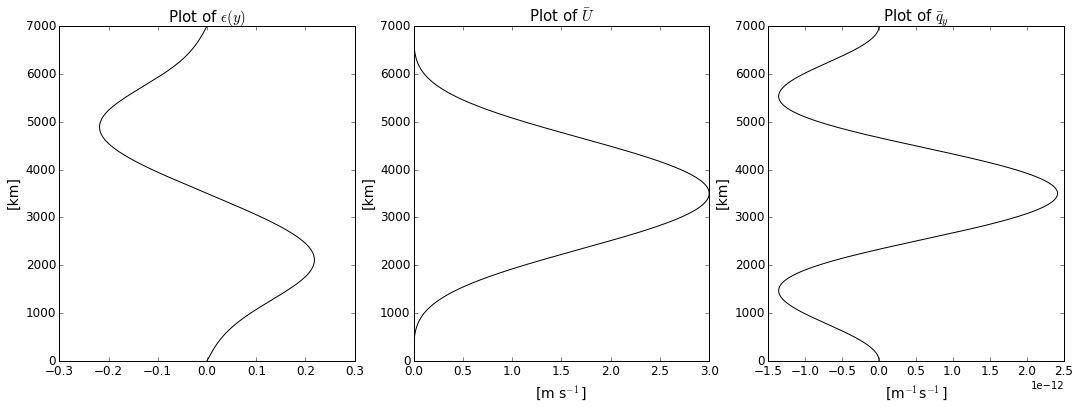

In [29]:
fig = plt.figure( figsize=(18,6) )

ax1 = fig.add_subplot(131)
ax1.plot(ep_b1, y_b1_mid*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
#ax.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $\epsilon(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot(U_b1, y_b1*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('[m s$^{-1}$]', fontsize=14)
ax2.set_title(r'Plot of $\bar{U}$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot(qy_b1, y_b1[1:-1]*1e-3, c='black')
ax3.set_ylabel('[km]', fontsize=14)
ax3.set_xlabel('[m$^{-1}$s$^{-1}$]', fontsize=14)
ax3.set_title(r'Plot of $\bar{q}_y$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

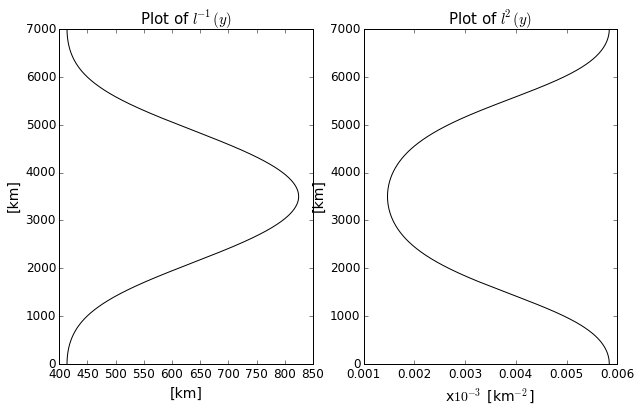

In [32]:
fig = plt.figure( figsize=(10,6) )

ax1 = fig.add_subplot(121)
ax1.plot(1./l_b1*1e-3, y_b1*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $l^{-1}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(l2_b1*1e9, y_b1*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('x$10^{-3}$ [km$^{-2}$]', fontsize=14)
ax2.set_title(r'Plot of $l^{2}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

##### Discussion

The WKB solution is only expected to be valid when the local wavelength is small compared to the scale of variation in the index refraction, i.e. $l^{-1} \ll \frac{\partial l \ / \ \partial y}{l}$. However, the WKB solution surprisingly seems to work well even though $\epsilon$ is actually not so much smaller than unity, viz. on the order of $O(10^{-1})$. Looking at the results of question ii., we see that although the values of $\epsilon$ are on the same order to the values in i., the WKB solution fails to reproduce the numerical solution in the lower layers. This is partially due to the fact that the WKB solution cannot incorporate the effects of internal reflection.

### ii.

In [33]:
Uo_b2 = 5.
y_b2, psi_b2, R_b2, a_b2, b_b2, l_b2, l2_b2 = psi_func(delta=delta_b, scalar=False, Uo=Uo_b2)

In [34]:
# yb = np.arange(0, L, delta_b)
U_b2 = Uo_b2 * ( np.sin(np.pi/L*y_b2) )**4
# ddUdyy_b2 = 4.*Uo_b2*( np.pi/L*np.sin(np.pi/L*y_b2) )**2 * ( 3.*( np.cos(np.pi/L*y_b2) )**2 - ( np.sin(np.pi/L*y_b2) )**2 )
# l_b2 = np.sqrt( (beta-ddUdyy_b2)/(U_b2-c) - k**2 )

In [35]:
# integrand = lambda y: ( beta - 4.*Uo_b2*( np.pi/L*np.sin(np.pi*y/L) )**2 * ( 3.*(np.cos(np.pi*y/L))**2 
#                                                         - (np.sin(np.pi*y/L))**2) ) / ( Uo_b2*(np.sin(np.pi*y/L))**4 - c ) - k**2

g_b2 = np.zeros( len(y_b2), dtype=complex )
for i in range(len(y_b2)):
#     g_b2[i] = integ.quad(integrand, y_b2[0], y_b2[i])[0]
    g_b2[i] = l_b2[:i].sum() * delta_b

In [36]:
R_WKB_b2 = 0.

psi_WKB_b2 = np.sqrt( l_b2[0] / l_b2 ) * np.exp( 
                                    1j*g_b2 ) + R_WKB_b2 * np.sqrt(l_b2[0]) / ( np.sqrt(l_b2) ) * np.exp( - 1j*g_b2 )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

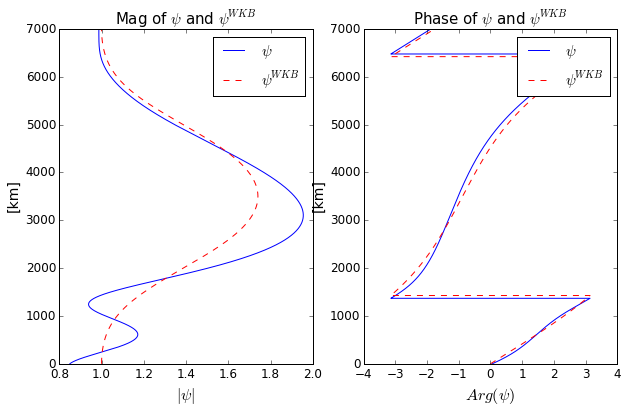

In [37]:
fig = plt.figure( figsize=(10,6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.absolute(psi_b2), y_b2*1e-3, 'b', label=r'$\psi$')
ax1.plot(np.absolute(psi_WKB_b2), y_b2*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('$|\psi|$', fontsize=16)
ax1.set_title(r'Mag of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(np.angle(psi_b2), y_b2*1e-3, 'b', label=r'$\psi$')
ax2.plot(np.angle(psi_WKB_b2), y_b2*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('$Arg(\psi)$', fontsize=16)
ax2.set_title(r'Phase of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

In [59]:
ep_b2 = ( - np.roll( 1./l_b2, 1 ) + 1./l_b2 )[1:] / delta_b
y_b2_mid = .5 * ( np.roll(y_b2, 1) + y_b2 )[1:]

qy_b2 = np.zeros( len(y_b2)-2 )

for i in range(1, len(qy_b2)+1):
    qy_b2[i-1] = - (U_b2[i+1] - 2.*U_b2[i] + U_b2[i-1]) / delta_b**2

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

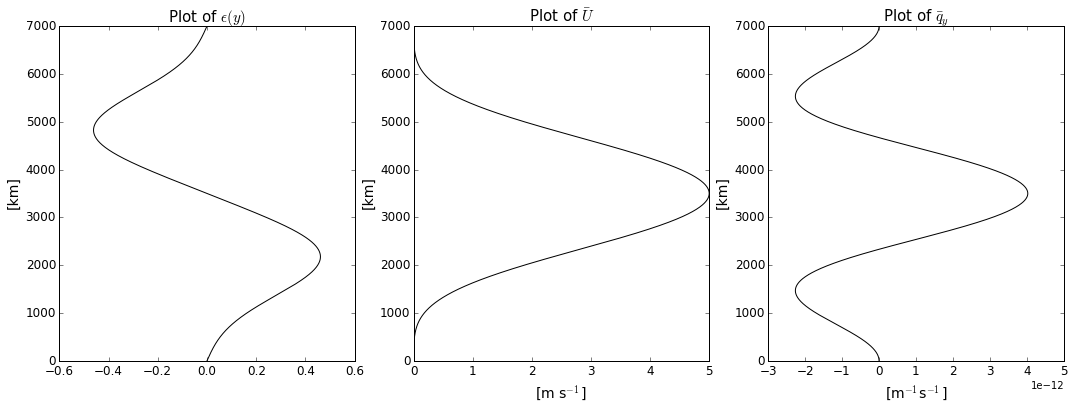

In [60]:
fig = plt.figure( figsize=(18,6) )

ax1 = fig.add_subplot(131)
ax1.plot(ep_b2, y_b2_mid*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
#ax.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $\epsilon(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot(U_b2, y_b2*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('[m s$^{-1}$]', fontsize=14)
ax2.set_title(r'Plot of $\bar{U}$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot(qy_b2, y_b2[1:-1]*1e-3, c='black')
ax3.set_ylabel('[km]', fontsize=14)
ax3.set_xlabel('[m$^{-1}$s$^{-1}$]', fontsize=14)
ax3.set_title(r'Plot of $\bar{q}_y$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

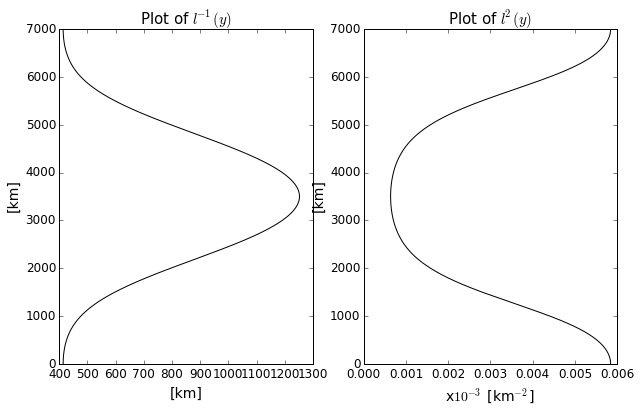

In [63]:
fig = plt.figure( figsize=(10,6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.reciprocal(l_b2)*1e-3, y_b2*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $l^{-1}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(l_b2**2*1e9, y_b2*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('x$10^{-3}$ [km$^{-2}$]', fontsize=14)
ax2.set_title(r'Plot of $l^{2}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

### iii.

In [31]:
Uo_b3 = 1e1
y_b3, psi_b3, R_b3, a_b3, b_b3, l_b3, l2_b3 = psi_func(delta=delta_b, scalar=False, Uo=Uo_b3)

In [32]:
U_b3 = Uo_b3 * ( np.sin(np.pi/L*y_b3) )**4
# ddUdyy_b3 = 4.*Uo_b3*( np.pi/L )**2 * ( 3.*(np.sin(np.pi/L*y_b3)*np.cos(np.pi/L*y_b3) )**2 - ( np.sin(np.pi/L*y_b3) )**4 )
# l2_b3 = (beta-ddUdyy)/(U-c) - k**2

l_b3 = np.zeros(len(y_b3), dtype=complex)
for i in range( len(l2_b3) ):
    if l2_b3[i] >= 0:
        l_b3[i] = np.sqrt( l2_b3[i] )
    else:
        l_b3[i] = 1j * np.sqrt( -l2_b3[i] )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

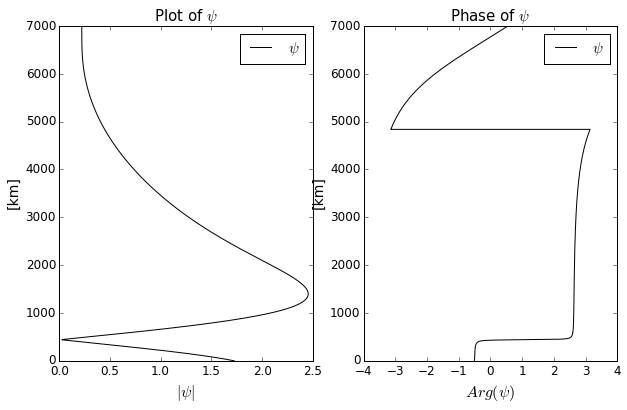

In [33]:
fig = plt.figure( figsize=(10,6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.absolute(psi_b3), y_b3*1e-3, c='black', label=r'$\psi$')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('$|\psi|$', fontsize=16)
ax1.set_title(r'Plot of $\psi$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(np.angle(psi_b3), y_b3*1e-3, c='black', label=r'$\psi$')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('$Arg(\psi)$', fontsize=16)
ax2.set_title(r'Phase of $\psi$', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

In [34]:
ep_b3 = ( - np.roll( 1./l_b3, 1 ) + 1./l_b3 )[1:] / delta_b
y_b3_mid = .5 * ( np.roll(y_b3, 1) + y_b3 )[1:]

qy_b3 = np.zeros( len(y_b3)-2 )

for i in range(1, len(qy_b3)+1):
    qy_b3[i-1] = - (U_b3[i+1] - 2.*U_b3[i] + U_b3[i-1]) / delta_b**2

/Users/UchidaTakaya/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

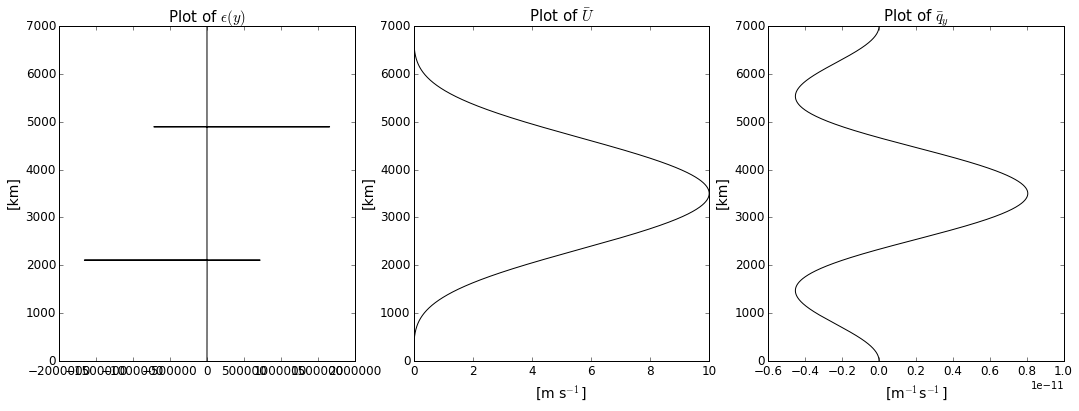

In [35]:
fig = plt.figure( figsize=(18,6) )

ax1 = fig.add_subplot(131)
ax1.plot(ep_b3, y_b3_mid*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
#ax.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $\epsilon(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot(U_b3, y_b3*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('[m s$^{-1}$]', fontsize=14)
ax2.set_title(r'Plot of $\bar{U}$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot(qy_b3, y_b3[1:-1]*1e-3, c='black')
ax3.set_ylabel('[km]', fontsize=14)
ax3.set_xlabel('[m$^{-1}$s$^{-1}$]', fontsize=14)
ax3.set_title(r'Plot of $\bar{q}_y$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

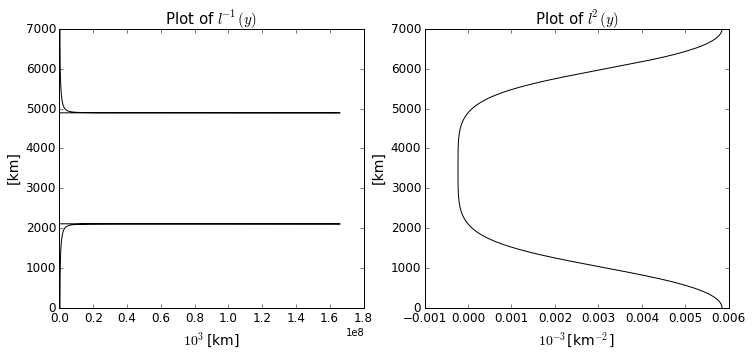

In [39]:
fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(121)
ax1.plot(1./l_b3, y_b3*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('$10^3$[km]', fontsize=14)
ax1.set_title(r'Plot of $l^{-1}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(122)
ax2.plot(l2_b3*1e9, y_b3*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('$10^{-3}$[km$^{-2}$]', fontsize=14)
ax2.set_title(r'Plot of $l^{2}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks(fontsize=12 )
plt.yticks( fontsize=12 )

## (c)

### i.

For constant $\bar{U}$, the background vorticity becomes, $\bar{q}_y = \beta$ so the PV equation is

$$ ik \big( \bar{U} - c \big) q' + ik\psi'\beta = -rq' $$

$$ \therefore \ \ \ ik \big( \bar{U} - c - i\frac{r}{k} \big) \bigg( \frac{\partial^2}{\partial y^2} - k^2 \bigg) \psi' + ik\psi'\beta = 0 $$

where we have used the relation, $q' = \nabla^2 \psi'$.

Hence,

$$ \big( \bar{U} - c - i \frac{r}{k} \big) \frac{\partial^2}{\partial y^2} \psi' + \bigg[ \beta - k^2 \big( \bar{U} - c - i \frac{r}{k} \big) \bigg] \psi' = 0 $$

$$ \therefore \ \ \ \frac{\partial^2}{\partial y^2} \psi' + \bigg[ \frac{\beta}{\big( \bar{U} - c - i \frac{r}{k} \big)} - k^2 \bigg] \psi' = 0 $$

so the meridional wavenumer is defined as:

$$ l^2(y) \equiv \frac{\beta}{\big( \bar{U} - c - i \frac{r}{k} \big)} - k^2 $$

Now, 

$$ \frac{1}{\bar{U} - c - i \frac{r}{k}} = \frac{\bar{U} - c + i\frac{r}{k}}{(\bar{U} - c)^2 + \big( \frac{r}{k} \big)^2 } \approx \frac{\bar{U} - c + i\frac{r}{k}}{(\bar{U} - c)^2} $$

so $l(y)$ becomes

$$ l^2(y) = \frac{\beta}{\bar{U} - c} - k^2 + i\frac{r}{k} \frac{\beta}{(\bar{U} - c)^2} \ \ \ \ (3.c.1) $$

Since $l(y)$ is a complex number, seperating them into the real ($l_r$) and imaginary ($l_i$) part gives

$$ l^2(y) = (l_r + i l_i)^2 = {l_r}^2 - {l_i}^2 + 2i l_r l_i \ \ \ \ (3.c.2) $$

From equations (3.c.1) and (3.c.2), we get the relation:

$$ {l_r}^2 - {l_i}^2 = \frac{\beta}{\bar{U} - c} - k^2 \ \ \ \ (3.c.3) $$

$$ 2 l_r l_i = \frac{r}{k} \frac{\beta}{(\bar{U} - c)^2} \ \ \ \ (3.c.4) $$

We see immediately from equation (3.c.4) that 

$$ l_i = \frac{r}{2k} \frac{\beta}{(\bar{U} - c)^2} \frac{1}{l_r} $$

is satisfied. Now taking the square of $l_i$ gives the term $(r/k)^2$ which is small so from equation (3.c.3), we get

$$ l_r \approx \sqrt{\frac{\beta}{\bar{U} - c} - k^2} $$

Since, $l_r$ and $l_i$ themselves are real values, plugging this into the poleward component of the propagating solution gives

$$ e^{\ ily} = e^{\ i(l_r + il_i) y} = e^{\ i l_r y} e^{- l_i y} $$

The term $e^{-l_i y}$ represents the amplitude of the wave and decreases as latitude increases. Thus the poleward propagating solution decays poleward.

### ii.

In [70]:
delta_c = 1e2
y_c2, psi_c2, R_c2, a_c2, b_c2, l_c2, l2_c2 = psi_func(delta=delta_c, bound=False, damp=True)
y_c2_nokin, psi_c2_nokin, R_c2_nokin, a_c2_nokin, b_c2_nokin, l_c2_nokin, l2_c2_nokin = psi_func(delta=delta_c, 
                                                                                                 bound=False, damp=True, approx=False)

In [71]:
r = 2e-2 / (24 * 60**2)

l_r = np.sqrt(beta/(-c) - k**2)    # U = 0
l_i = .5 * r * beta / ( k*c**2*l_r )

print l_r, l_i, l_c2

2.41708935164e-06 1.29165162851e-07 (2.41708935164e-06+1.29165162851e-07j)


In [72]:
print 'Reflection coefficient: ', np.absolute(R_c2)
print 'Expected value the reflection coefficient: ', np.exp(- 2 * l_i * L)

Reflection coefficient:  0.163934806811
Expected value the reflection coefficient:  0.163930572383


##### Discussion

We see from the values above that the magnitude of the reflection coeffient is equivalent to $e^{-2l_iL}$. 

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

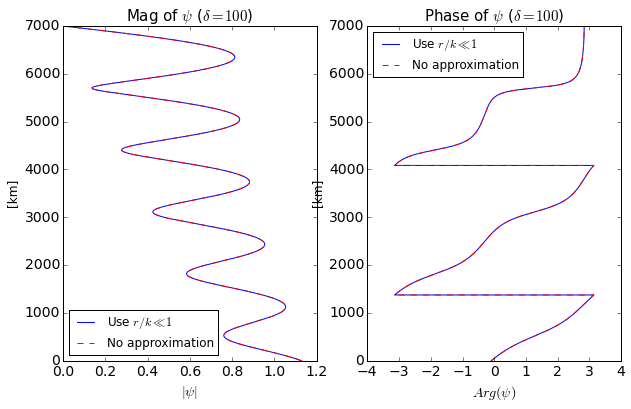

In [16]:
fig = plt.figure( figsize=(10, 6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.absolute(psi_c2), y_c2*1e-3, 'b', label=r'Use $r/k \ll 1$')
ax1.plot(np.absolute(psi_c2_nokin), y_c2_nokin*1e-3, 'r--', label=r'No approximation')
ax1.set_xlabel(r'$|\psi|$', fontsize=14)
ax1.set_ylabel('[km]', fontsize=12)
ax1.set_title('Mag of $\psi$ ($\delta=100$)', fontsize=15)
plt.legend(loc='lower left', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(np.angle(psi_c2), y_c2*1e-3, 'b', label=r'Use $r/k \ll 1$')
ax2.plot(np.angle(psi_c2_nokin), y_c2_nokin*1e-3, 'r--', label=r'No approximation')
ax2.set_xlabel(r'$Arg(\psi)$', fontsize=14)
ax2.set_ylabel('[km]', fontsize=12)
ax2.set_title('Phase of $\psi$ ($\delta=100$)', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### iii.

In [64]:
r_c3 = 1e-1

y_c3, psi_c3, R_c3, a_c3, b_c3, l_c3, l2_c3 = psi_func(delta=delta_c, bound=False, damp=True, r=r_c3)
y_c3_nokin, psi_c3_nokin, R_c3_nokin, a_c3_nokin, b_c3_nokin, l_c3_nokin, l2_c3_nokin = psi_func(delta=delta_c, 
                                                                                                 bound=False, damp=True, approx=False, r=r_c3)

In [65]:
r = r_c3 / (24 * 60**2)

l_r = np.sqrt(beta/(-c) - k**2)    # U = 0
l_i = .5 * r * beta / ( k*c**2*l_r )

print l_r, l_i, l_c3

2.41708935164e-06 6.45825814256e-07 (2.41708935164e-06+6.45825814256e-07j)


In [68]:
print 'Reflection coefficient: ', np.absolute(R_c3)
print 'Expected value the reflection coefficient: ', np.exp(- 2 * l_i * L)

Reflection coefficient:  0.000118402278739
Expected value the reflection coefficient:  0.00011838584446


##### Discussion

We see from the values above that the magnitude of the reflection coeffient is equivalent to $e^{-2l_iL}$. 

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

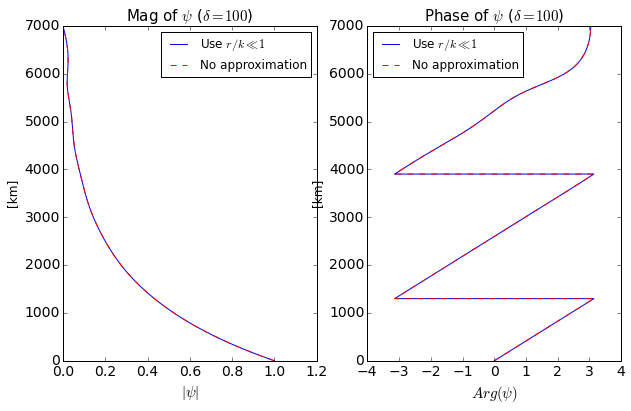

In [20]:
fig = plt.figure( figsize=(10, 6) )

ax1 = fig.add_subplot(121)
ax1.plot(np.absolute(psi_c3), y_c3*1e-3, 'b', label=r'Use $r/k \ll 1$')
ax1.plot(np.absolute(psi_c3_nokin), y_c3_nokin*1e-3, 'r--', label=r'No approximation')
ax1.set_xlabel(r'$|\psi|$', fontsize=15)
ax1.set_ylabel('[km]', fontsize=12)
ax1.set_title('Mag of $\psi$ ($\delta=100$)', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(np.angle(psi_c3), y_c3*1e-3, 'b', label=r'Use $r/k \ll 1$')
ax2.plot(np.angle(psi_c3_nokin), y_c3_nokin*1e-3, 'r--', label=r'No approximation')
ax2.set_xlabel(r'$Arg(\psi)$', fontsize=15)
ax2.set_ylabel('[km]', fontsize=12)
ax2.set_title('Phase of $\psi$ ($\delta=100$)', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

##### Reason why the resemblance of a standing wave decreases:

Shorter damping time scales means that there is more damping per time. Hence, the internally reflected waves are damped out faster, resulting in less interference between the propagating and reflected wave.

## (d)

When the background zonal velocity is not a constant, the PV equation becomes

$$ ik ( \bar{U} - c ) q' + v' \bar{q}_y = -rq' $$

$$ \therefore \ \ \ \ ik \big( \bar{U} - c - i\frac{r}{k} \big) \big( \frac{\partial^2}{\partial y^2} - k^2 \big) \psi' + ik \psi' \big( \beta - \frac{\partial^2 \bar{U}}{\partial y^2} \big) = 0 $$

Hence,

$$ \frac{\partial^2}{\partial y^2} \psi' + l^2(y) \psi' ; \ \ \ \ l^2(y) = \frac{\beta - \partial^2 \bar{U} / \partial y^2}{\bar{U} - c - i \frac{r}{k}} - k^2 $$

Assuming that $\frac{r}{k} \ll 1$, we have

$$ l^2(y) \approx \frac{\beta - \partial^2 \bar{U} / \partial y^2}{\bar{U} - c} - k^2 + i \frac{r}{k} \frac{\beta - \partial^2 \bar{U} / \partial y^2}{(\bar{U} - c)^2} $$

and 

$$ l_r \approx \sqrt{ \frac{\beta - \partial^2 \bar{U} / \partial y^2}{\bar{U} - c} - k^2 }, \ \ \ \ l_i \approx \frac{r}{2k} \frac{\beta - \partial^2 \bar{U} / \partial y^2}{(\bar{U} - c)^2} \frac{1}{l_r} $$

For the WKB solution, when the top boundary condition is a rigid lid, we have $ \psi'(L) = 0 $ so,

$$ \psi'(L) = \sqrt{\frac{l(0)}{l(L)}} e^{\ i \int^L_0 l(y) dy} + R^{WKB} \sqrt{\frac{l(0)}{l(L)}} e^{- i \int^L_0 l(y) dy} = 0 $$

and we shall solve for the reflection coefficient, $R^{WKB}$ which gives

$$ R^{WKB} = - e^{\ i 2 g(L)} $$

In [4]:
Uo_d = -1e1
c_d = -5e0
delta_d = 5e2
r_d = 2e-2 / (24 * 60**2)

In [5]:
y_d, psi_d, R_d, a_d, b_d, l_d, l2_d = psi_func(c=c_d, delta=delta_d, bound=False, scalar=False, damp=True, Uo=Uo_d)
y_d_nokin, psi_d_nokin, R_d_nokin, a_d_nokin, b_d_nokin, l_d_nokin, l2_d_nokin = psi_func(c=c_d, delta=delta_d, 
                                                                                                 bound=False, scalar=False, damp=True, approx=False, Uo=Uo_d)

In [7]:
g_dL = l_d.sum() * delta_d
print g_dL

(1081.09263778+95.4911409921j)


In [8]:
R_d_WKB = - np.exp(2j * g_dL)

# print R_d, R_d_WKB
print 'The magnitude of the reflection coefficient for the numerical method is: ', np.absolute(R_d)
print 'The magnitude of the reflection coefficient for the WKB method is: ', np.absolute(R_d_WKB)

The magnitude of the reflection coefficient for the numerical method is:  0.633558497267
The magnitude of the reflection coefficient for the WKB method is:  1.14142871255e-83


##### Reason of magnitude difference in $R$ and $R^{WKB}$ 

While as the numerical method fully resolves the effects the WKB method cannot include internal reflection in its calculation. This difference is likely the cause for the magnitude difference of the reflection coefficient.

In [9]:
U_d = Uo_d * ( np.sin(np.pi/L*y_d) )**4

In [10]:
g_d = np.zeros( len(y_d) ).astype(complex)

for i in range(1, len(y_d)):
#     g_d[i] = integ.quad(integrand, y_b2[0], y_b2[i])[0]
    g_d[i] =  l_d[:i].sum() * delta_d

In [11]:
psi_WKB_d = np.sqrt(l_d[0]) / ( np.sqrt(l_d) ) * np.exp( 
                                    1j*g_d ) + R_d_WKB * np.sqrt(l_d[0]) / ( np.sqrt(l_d) ) * np.exp( - 1j*g_d )
# psi_WKB_d = sqrt(l_d[0]) / ( sqrt(l_d) ) * ( cos(g_d) +  
#                                     1j*sin(g_d) ) + R_d * sqrt(l_d[0]) / ( sqrt(l_d) ) * ( cos(g_d) - 1j*sin(g_d ) )

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

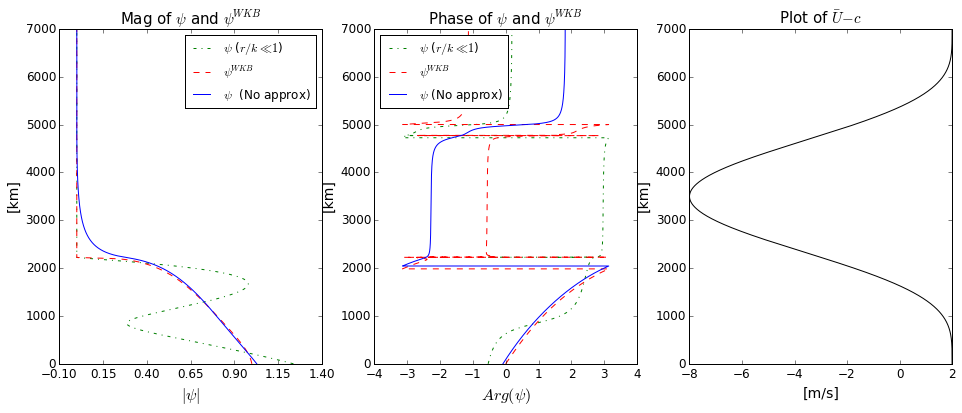

In [49]:
xticks_array = np.linspace(-.1, 1.4, 7)

fig = plt.figure( figsize=(16,6) )

ax1 = fig.add_subplot(131)
ax1.plot(np.absolute(psi_d), y_d*1e-3, 'g-.', label=r'$\psi$ ($r/k \ll 1$)')
ax1.plot(np.absolute(psi_WKB_d), y_d*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax1.plot(np.absolute(psi_d_nokin), y_d_nokin*1e-3, 'b', label=r'$\psi$  (No approx)')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('$|\psi|$', fontsize=16)
ax1.set_title(r'Mag of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(xticks_array, fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot(np.angle(psi_d), y_d*1e-3, 'g-.', label=r'$\psi$ ($r/k \ll 1$)')
ax2.plot(np.angle(psi_WKB_d), y_d*1e-3, 'r--', label=r'$\psi^{WKB}$')
ax2.plot(np.angle(psi_d_nokin), y_d_nokin*1e-3, 'b', label=r'$\psi$ (No approx)')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('$Arg(\psi)$', fontsize=16)
ax2.set_title(r'Phase of $\psi$ and $\psi^{WKB}$', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot( U_d-c, y_d*1e-3, c='black' )
ax3.set_ylabel('[km]', fontsize=14)
ax3.set_xlabel('[m/s]', fontsize=14)
ax3.set_title(r'Plot of $\bar{U} - c$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

##### Discussion

I was expecting to see similar solutions for question (d) and (c)ii below the critical level due to the same dissipation rate and rigid boundary condition. The calculation using the approximation, $r/k \ll 1$ reproduces this feature but the exact solution without any approximation in the index of refraction surprisingly has no internal reflection features. This result infers two things; $r=50 day^{-1}$ is too large to use the approximation $r/k\ll 1$ and that in the exact numerical solution the internal reflections are all absorbed at the critical level. 

Above the critical level the waves get absorbed, i.e. the magnitude of the stream function, $|\psi|$ rapidly decreases above the critical level in (d), which is a little below 2000 km from the figure of $\bar{U} - c$. Although the top boundary condition is a rigid lid and thus there should be reflection at the top boundary, most of the poleward propagating wave is absorbed at the critical level and decays rapidly above that so the effects of reflection is negligible in (d), which is also verified from the small value of $R$.


In [43]:
ep_d = ( - np.roll( 1./l_d, 1 ) + 1./l_d )[1:] / delta_d
y_d_mid = .5 * ( np.roll(y_d, 1) + y_d )[1:]

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

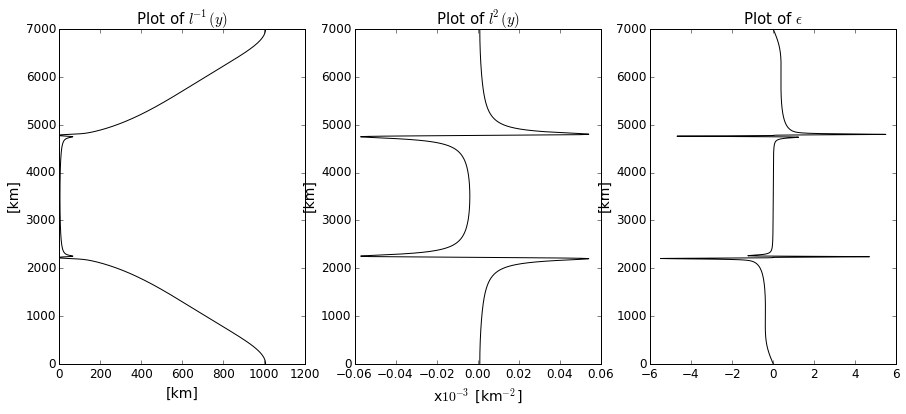

In [44]:
fig = plt.figure( figsize=(15,6) )

ax1 = fig.add_subplot(131)
ax1.plot(1./l_d*1e-3, y_d*1e-3, c='black')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel('[km]', fontsize=14)
ax1.set_title(r'Plot of $l^{-1}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot(l2_d*1e9, y_d*1e-3, c='black')
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('x$10^{-3}$ [km$^{-2}$]', fontsize=14)
ax2.set_title(r'Plot of $l^{2}(y)$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks(fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot(ep_d, y_d_mid*1e-3, c='black')
ax3.set_ylabel('[km]', fontsize=14)
# ax3.set_xlabel('[km$^{-2}$]', fontsize=14)
ax3.set_title(r'Plot of $\epsilon$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks(fontsize=12 )
plt.yticks( fontsize=12 )

In [46]:
qy_d = np.zeros( len(y_d)-2 )

for i in range(1, len(qy_d)+1):
    qy_d[i-1] = - (U_d[i+1] - 2.*U_d[i] + U_d[i-1]) / delta_d**2

zeta = - qy_d / (U_d[1:-1] - c - 1j*r_d/k) * psi_d[1:-1]

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.]),
 <a list of 8 Text yticklabel objects>)

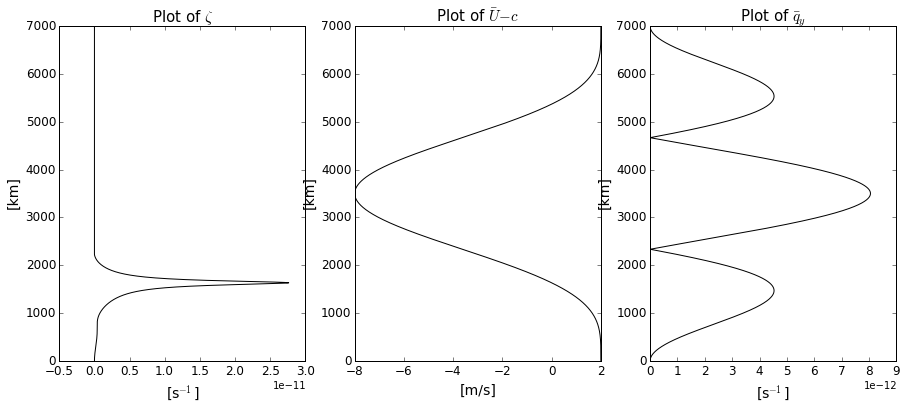

In [47]:
xticks_array = np.linspace(-5e-12, 3e-11, 8)

fig = plt.figure( figsize=(15,6) )

ax1 = fig.add_subplot(131)
ax1.plot(np.absolute(zeta), y_d[1:-1]*1e-3, c='black')
# ax1.set_xscale('log')
ax1.set_ylabel('[km]', fontsize=14)
ax1.set_xlabel(r'[s$^{-1}$]', fontsize=14)
ax1.set_title(r'Plot of $\zeta$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( xticks_array, fontsize=12 )
plt.yticks( fontsize=12 )

ax2 = fig.add_subplot(132)
ax2.plot( U_d-c, y_d*1e-3, c='black' )
ax2.set_ylabel('[km]', fontsize=14)
ax2.set_xlabel('[m/s]', fontsize=14)
ax2.set_title(r'Plot of $\bar{U} - c$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

ax3 = fig.add_subplot(133)
ax3.plot(np.absolute(qy_d), y_d[1:-1]*1e-3, c='black')
ax3.set_ylabel('[km]', fontsize=14)
ax3.set_xlabel(r'[s$^{-1}$]', fontsize=14)
ax3.set_title(r'Plot of $\bar{q}_y$', fontsize=15)
# plt.legend(loc='upper center', fontsize=15)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )